# Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print(f'Quantidade de linhas: {alucar.shape[0]} e colunas: {alucar.shape[1]}')

Quantidade de linhas: 24 e colunas: 2


In [4]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

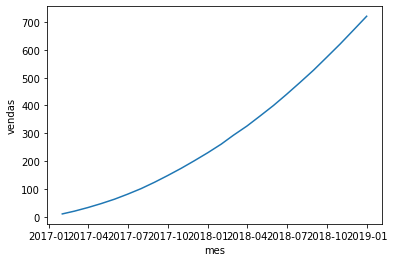

In [8]:
sns.lineplot(x='mes', y='vendas', data=alucar)

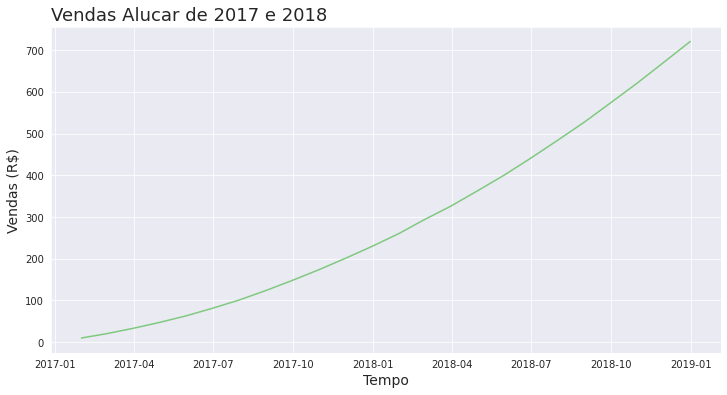

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [10]:
alucar['aumento'] = alucar['vendas'].diff()   # Subtrai as vendas de um mês pelo anterior
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


## Criação de uma Função para padronizar o Plot

In [11]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

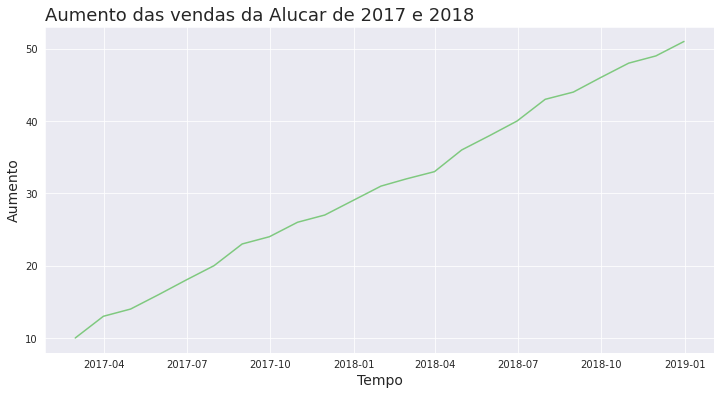

In [12]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [13]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


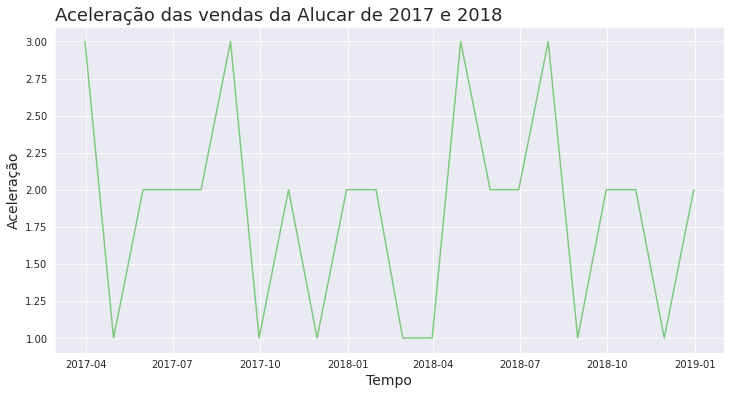

In [14]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

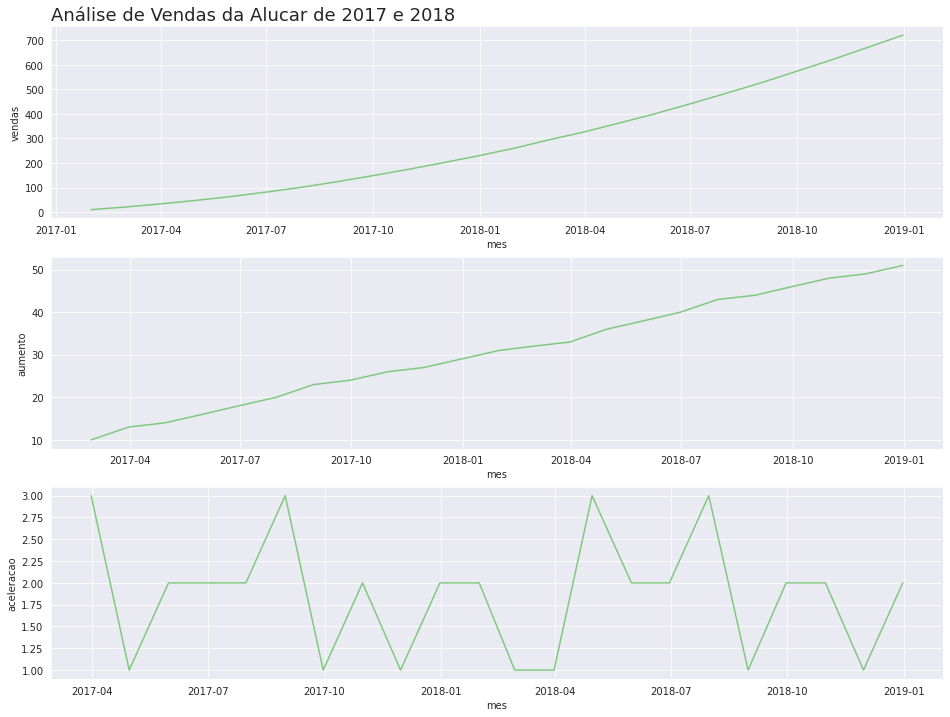

In [15]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)

plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)

plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

ax = ax

## Criação de uma Função

In [16]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)

  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)

  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)

  ax = ax

## Correlação

O valor de autocorrelação entre 0,7 e 0,9, indica que temos uma correlação forte.
<br>
O valor de autocorrelação 1 ou -1 indica uma correlação perfeita.
<br>
O valor de autocorrelação 0 indica uma correlação nula.

In [17]:
from pandas.plotting import autocorrelation_plot

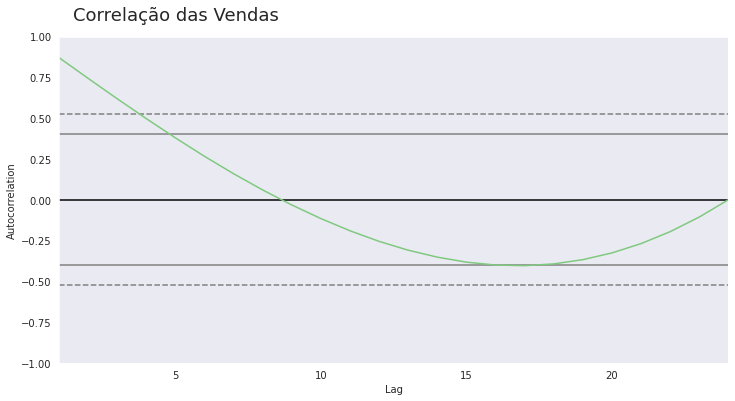

In [18]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

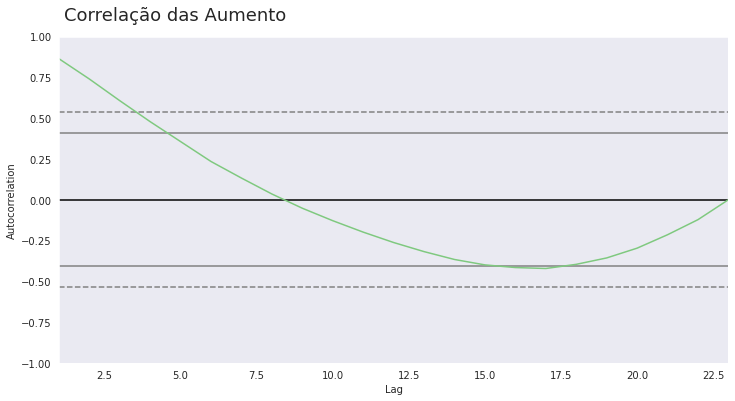

In [19]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])   # O aumento começa no indice 1
ax = ax

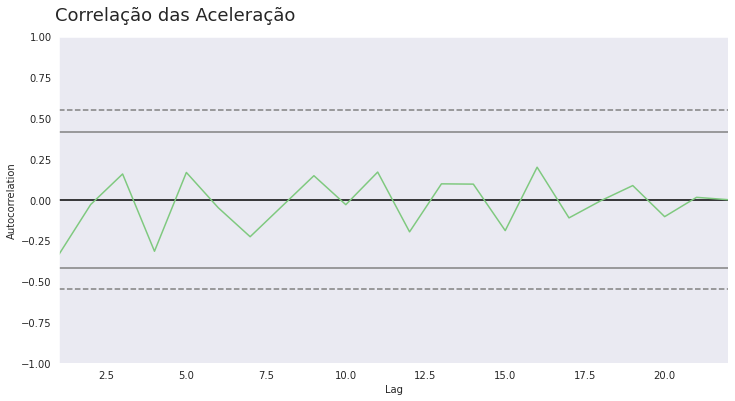

In [20]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])   # A aceleração começa no indice 2
ax = ax

# Alucar - Analisando assinantes da newsletter

In [22]:
assinantes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [24]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [25]:
print(f'Quantidade de linhas: {assinantes.shape[0]} e colunas: {assinantes.shape[1]}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas: 24 e colunas: 2
Quantidade de dados nulos: 0


In [26]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [27]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


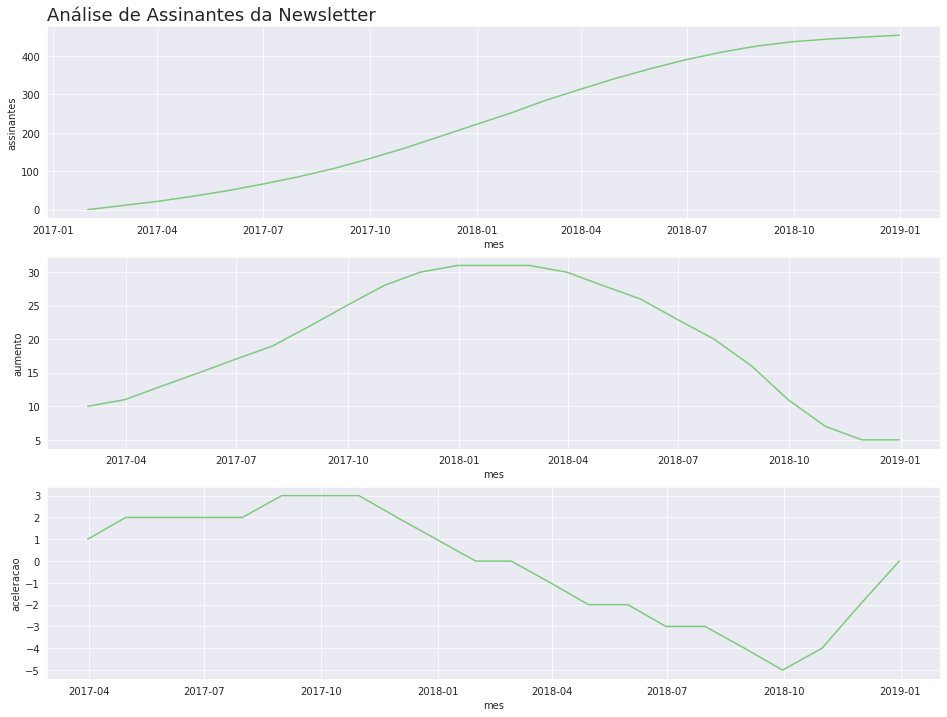

In [28]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da Newsletter')

# Chocolura - Analisando as vendas

In [29]:
chocolura = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [32]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [33]:
print(f'Quantidade de linhas: {chocolura.shape[0]} e colunas: {chocolura.shape[1]}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Quantidade de linhas: 24 e colunas: 2
Quantidade de dados nulos: 0


In [34]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


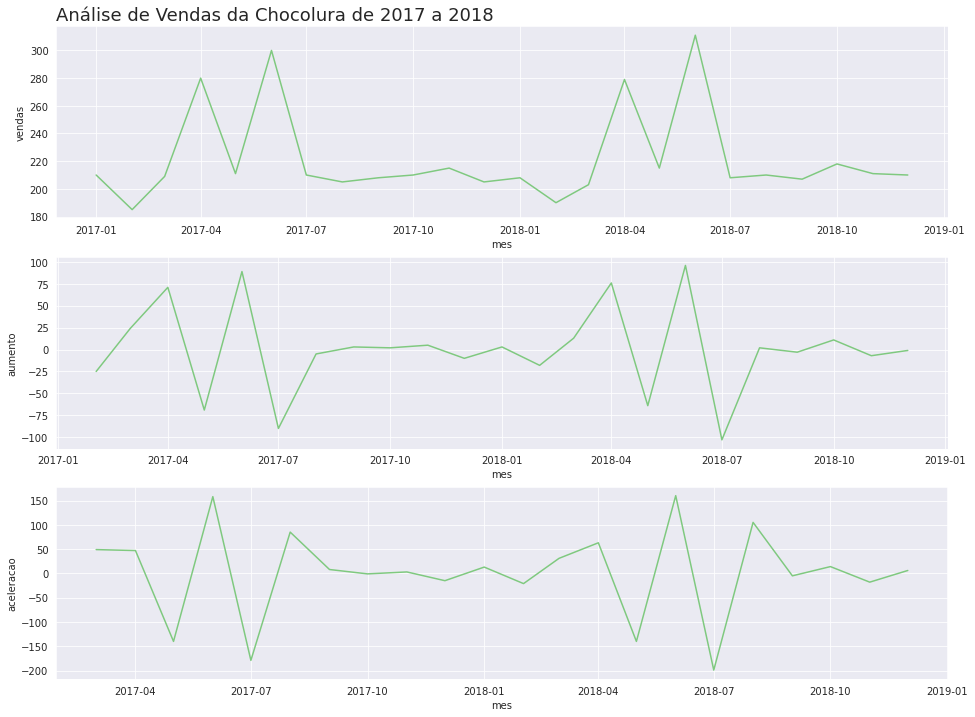

In [35]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de Vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas Diárias (Outubro e Novembro)

In [36]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [38]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [39]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [40]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


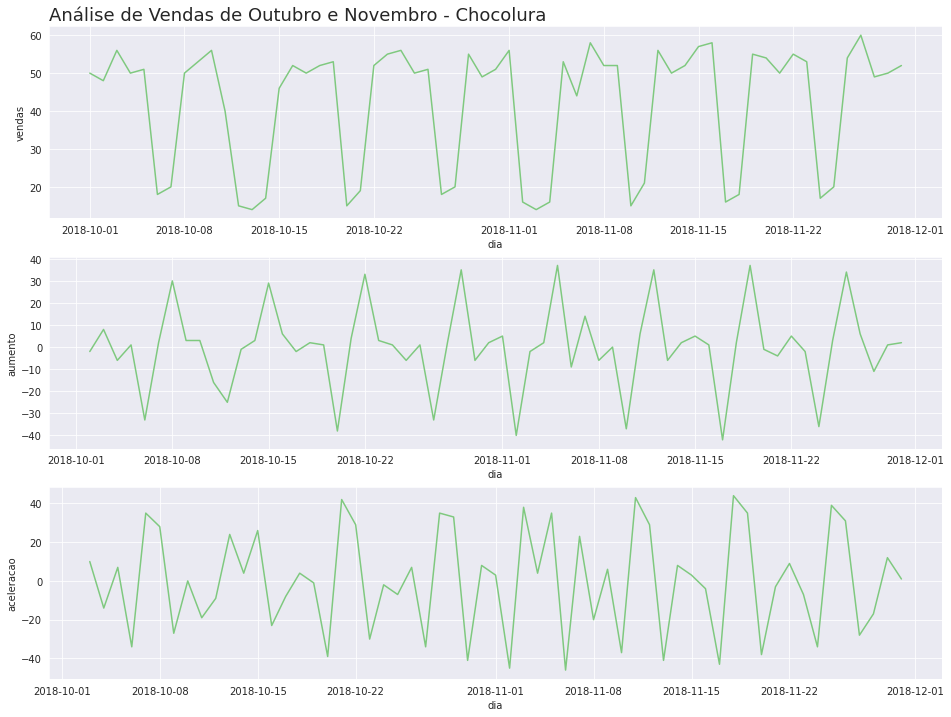

In [41]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro - Chocolura')

### Analisando a sazonalidade

**Analisamos as vendas da Chocolura e descobrimos um padrão repetitivo no movimento das vendas dentro de um período de tempo fixo, na qual é chamado de Sazonalidade**

In [44]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
5,2018-10-06,18,-33.0,-34.0,5
6,2018-10-07,20,2.0,35.0,6


In [45]:
vendas_por_dia['dia_da_semana'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [46]:
dias_substituidos = {
    0 : 'Segunda',
    1 : 'Terça', 
    2 : 'Quarta', 
    3 : 'Quinta', 
    4 : 'Sexta', 
    5 : 'Sábado', 
    6 : 'Domingo'
}

In [47]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_substituidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo


### Agrupando os Dias

In [48]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


### Correlação da Vendas Diárias

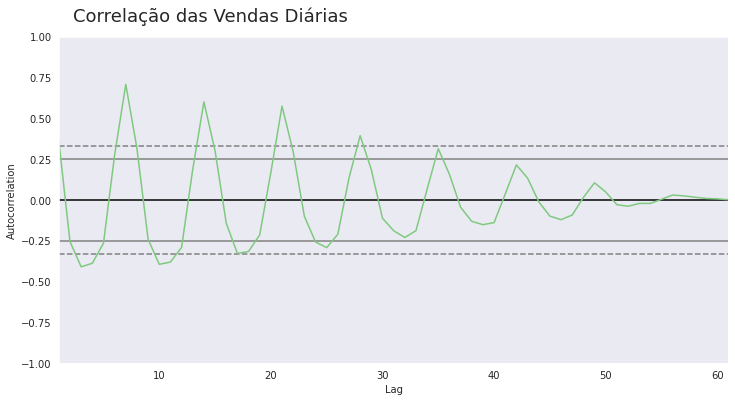

In [49]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

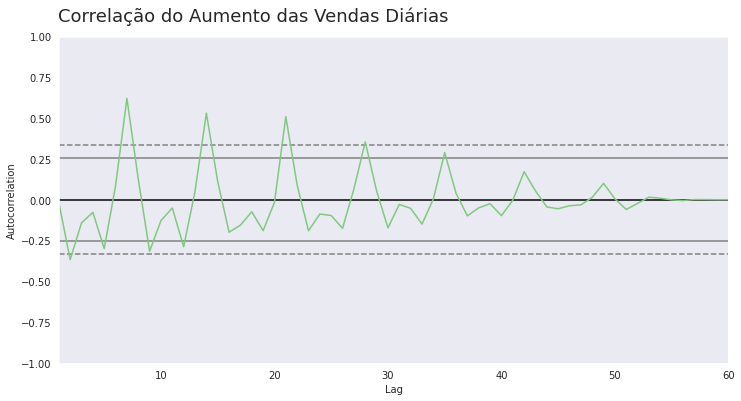

In [50]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

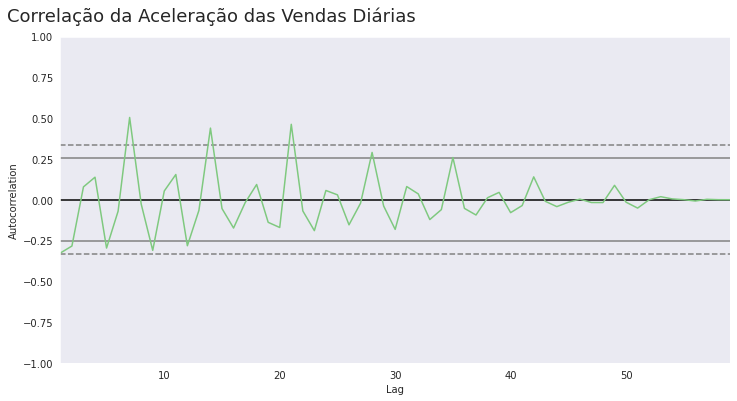

In [51]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [52]:
cafelura = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [53]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [54]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [55]:
print(f'Quantidade de linhas e colunas: {cafelura.shape}')
print(f'Quantidade de dados nulos: {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


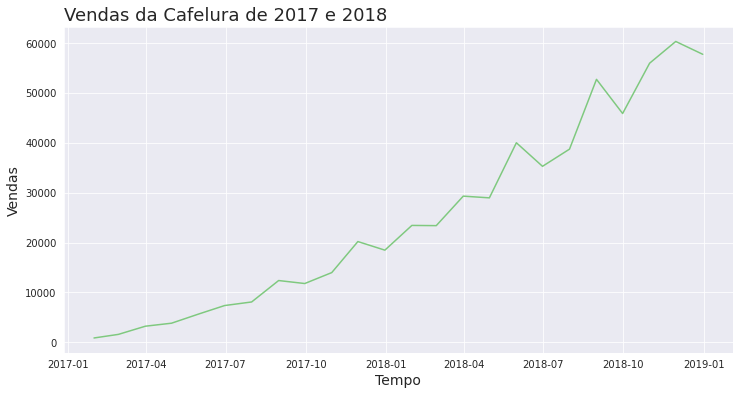

In [56]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [57]:
quantidade_de_dias_de_fds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [58]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [59]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


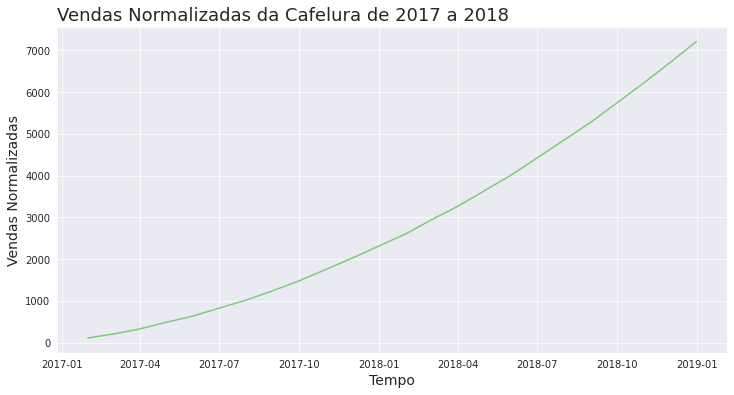

In [60]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

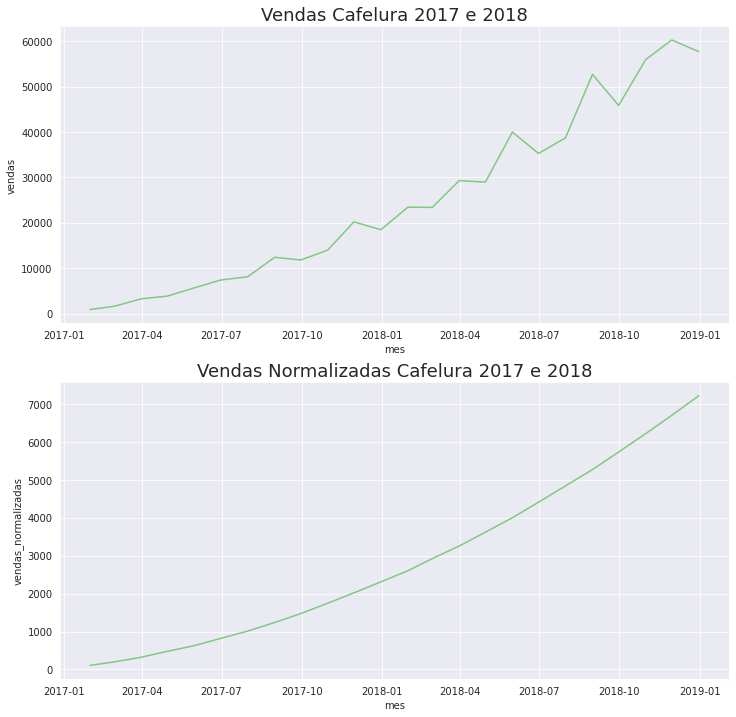

In [62]:
plt.figure(figsize=(12, 12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)

ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

**Sazonalidade se refere a um padrão repetitivo dentro de um período fixo de tempo**

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

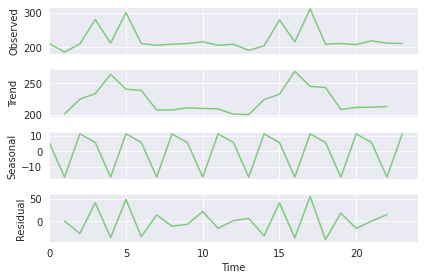

In [65]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [66]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [67]:
data = ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


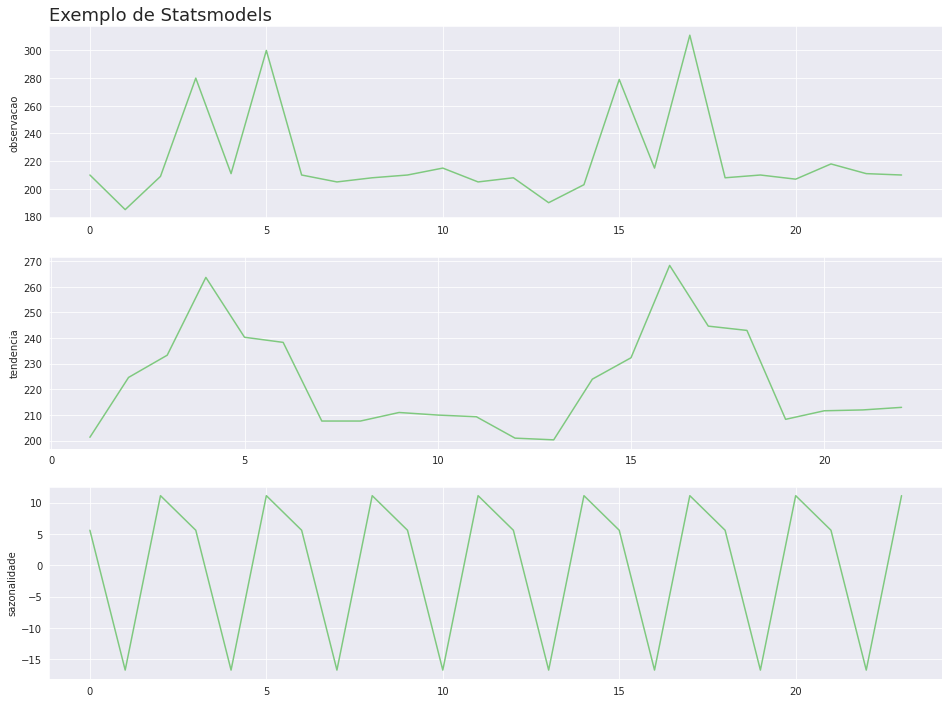

In [68]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de Vendas

In [69]:
alucel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/timeSeries/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [70]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [71]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [72]:
print(f'Quantidade de linhas e colunas: {alucel.shape} ')
print(f'Quantidade de dados nulos: {alucel.isna().sum().sum()} ')

Quantidade de linhas e colunas: (61, 2) 
Quantidade de dados nulos: 0 


In [73]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


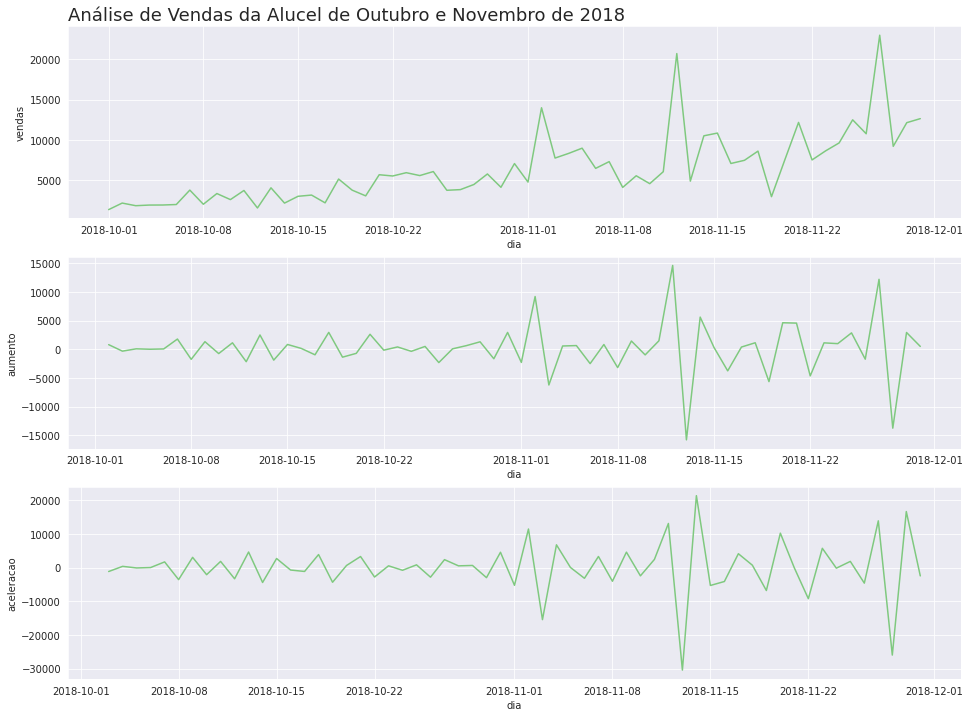

In [74]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

## Média Móvel

In [76]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


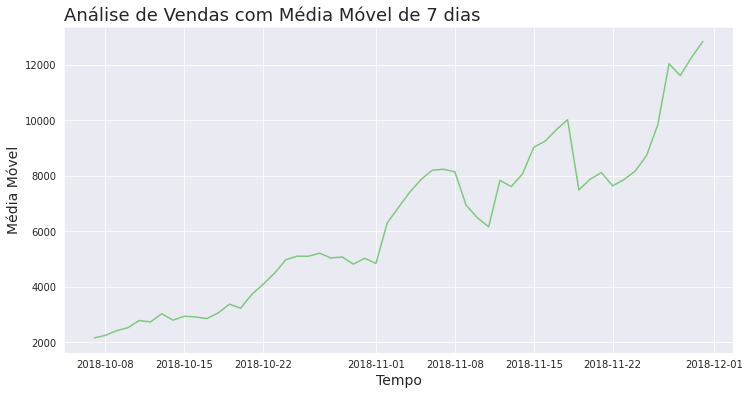

In [77]:
plotar('Análise de Vendas com Média Móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

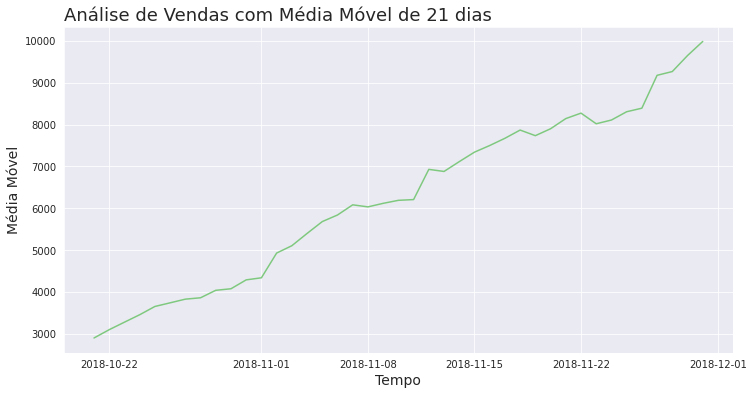

In [78]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de Vendas com Média Móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

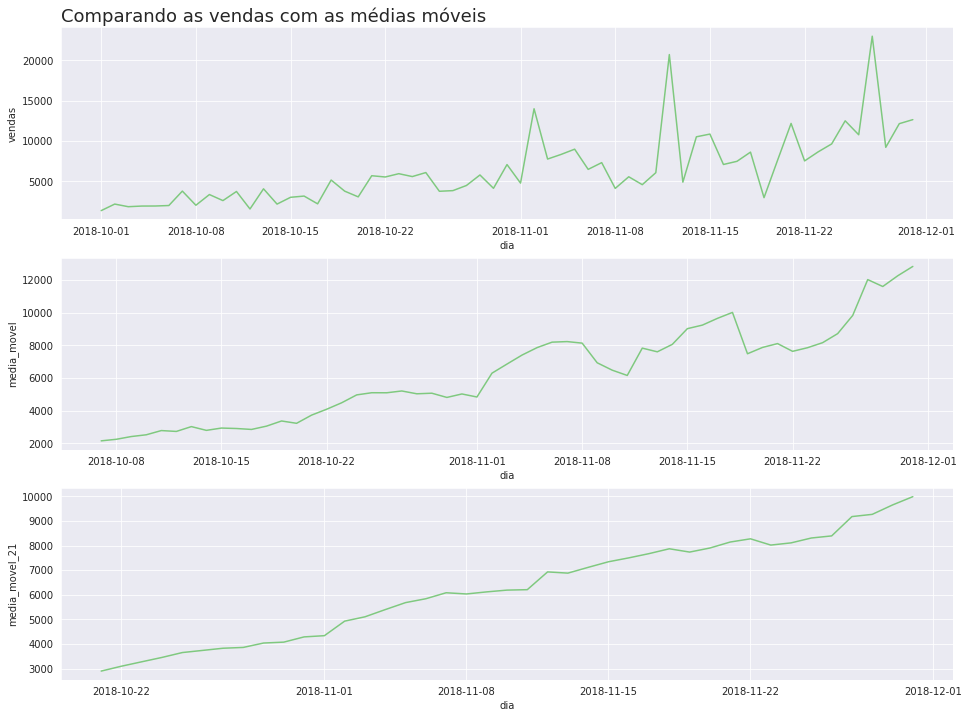

In [79]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com as médias móveis')